Sherry Zhang
3/15/22

Forest Fire Analysis

Does the temperature of California affect how many wildfires occur?
Does the amount of rainfall/drought affect the amount of wildfires?
Is there a correlation between the amount of earthquakes and wildfires?

Datasets:
fire.csv - Chosen because of the amount of data it provided; it spanned a long amount of time so that we could better observe patterns. Also provided amount of acres burned

spi.csv - Chosen because of the type of data it provides. It has SPI, and amount of land in each drought categories which helped for comparison

temp.csv - Chosen because of how it provides average temperature for each month which allows us to compare it to other monthly 
occurrences and data

earthquakes.csv - Chosen because of how far back the data goes, and that it was all in one file

Cleaning up data:

Overall reformat everything to have standardized labels

Fire data - remove object ID (no use), state (all from California, unnecessary), agency, unit ID, inc_num, cause, comment, report ac, c_method, objective, fire_num
    All of these columns have no use to our analysis
        Either they are irrelevant or they things like cause which are just numbers don't make sense and cannot contribute to this study
    Reformated ALARM_DATE to DATE and moved the date so that the info would be month/year

Temperature data - remove non california data
    Then remove uncertainty, state, and country data, all irrelevant to the study
    Reformat date info from year-month-date to date/year

SPI data
    Rename column 1 from 0 to SPI
    Reformat date info from d_yearmonthdate to date/year
    Add new column to dataframe to note whether a date was more dry or wet

Earthquake data

Storm data

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

#Clean fire data
fire_data = pd.read_csv('Data/fire.csv')

fire_drop_columns = ['OBJECTID', 'STATE', 'AGENCY', 'UNIT_ID', 'INC_NUM', 'CAUSE', 'COMMENTS', 'REPORT_AC', 'C_METHOD', 'OBJECTIVE', 'FIRE_NUM']

#drop columns
for column in fire_drop_columns:
    del fire_data[column]

#Reformat date data
for ind in fire_data.index:
    if isinstance(fire_data['ALARM_DATE'][ind], str):
        fire_data['ALARM_DATE'][ind] = fire_data['ALARM_DATE'][ind][5:7]+'/'+fire_data['ALARM_DATE'][ind][0:4]

fire_data = fire_data.rename(columns={'ALARM_DATE':'DATE'})

print(fire_data)


C:\Users\zhangs25\AppData\Local\Temp/ipykernel_17472/2031375400.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_data['ALARM_DATE'][ind] = fire_data['ALARM_DATE'][ind][5:7]+'/'+fire_data['ALARM_DATE'][ind][0:4]


        YEAR_                       FIRE_NAME     DATE  \
0      2020.0                          NELSON  06/2020   
1      2020.0                         AMORUSO  06/2020   
2      2020.0                          ATHENS  08/2020   
3      2020.0                         FLEMING  03/2020   
4      2020.0                        MELANESE  04/2020   
5      2020.0                             PFE  07/2020   
6      2020.0                          VALLEY  07/2020   
7      2020.0                           WALDO  07/2020   
8      2020.0                          WILLOW  03/2020   
9      2020.0                         WILLOWS  09/2020   
10     2020.0                            DYER  07/2020   
11     2020.0                         FARRIER  07/2020   
12     2020.0                          FIELDS  10/2020   
13     2020.0                           JONES  08/2020   
14     2020.0                       PAVE PAWS  08/2020   
15     2020.0                           RIOSA  06/2020   
16     2020.0 

In [58]:
#Clean temperature data

#import temperature data
temp_data = pd.read_csv('Data/temp.csv')

#select only California data
temp_data = temp_data.loc[temp_data["State"] == 'California']
#Reset index to 0, 1, 2,...
temp_data.reset_index(inplace = True, drop = True)

temp_data = temp_data.rename(columns={'dt':'DATE', 'AverageTemperature':'AVGTEMP'})

#Remove unnecessary columns
temp_drop_columns = ['AverageTemperatureUncertainty', 'State', 'Country']

for column in temp_drop_columns:
    del temp_data[column]

#Reformat date column
for ind in temp_data.index:
    temp_data['DATE'][ind] = temp_data['DATE'][ind][5:7]+'/'+temp_data['DATE'][ind][0:4]

print(temp_data)

C:\Users\zhangs25\AppData\Local\Temp/ipykernel_17472/4051045233.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data['DATE'][ind] = temp_data['DATE'][ind][5:7]+'/'+temp_data['DATE'][ind][0:4]


         DATE  AVGTEMP
0     01/1849    5.591
1     02/1849    6.941
2     03/1849    9.731
3     04/1849   12.294
4     05/1849   14.417
5     06/1849   21.091
6     07/1849   25.556
7     08/1849   24.992
8     09/1849   20.499
9     10/1849   14.725
10    11/1849    8.506
11    12/1849    3.898
12    01/1850    4.261
13    02/1850    6.284
14    03/1850    8.171
15    04/1850   12.680
16    05/1850   16.217
17    06/1850   20.183
18    07/1850   23.411
19    08/1850   24.874
20    09/1850   21.073
21    10/1850   15.592
22    11/1850    8.356
23    12/1850    3.513
24    01/1851    5.070
25    02/1851    6.228
26    03/1851    9.357
27    04/1851   13.462
28    05/1851   16.256
29    06/1851   21.385
30    07/1851   23.417
31    08/1851   24.286
32    09/1851   20.399
33    10/1851   15.339
34    11/1851    9.166
35    12/1851    5.358
36    01/1852    5.683
37    02/1852    7.614
38    03/1852    7.970
39    04/1852   10.942
40    05/1852   16.458
41    06/1852   22.035
42    07/18

In [59]:
#Clean spi data

spi_data = pd.read_csv('Data/spi.csv')

spi_data = spi_data.rename(columns={'0': 'SPI'})
# print(spi_data)

#reformat date
for ind in spi_data.index:
    spi_data['DATE'][ind] = spi_data['DATE'][ind][6:8]+'/'+spi_data['DATE'][ind][2:6]

#Add column for dry/wet scale
dry_or_wet = []
for ind in spi_data.index:
    vals = [0,0]

    for val in range(2, 7):
        vals[0] += spi_data.iloc[ind, val]
    
    for val in range(8, 13):
        vals[1] += spi_data.iloc[ind, val]

    max_val = max(vals)

    if vals.index(max_val) == 0:
        max_val *= -1
    
    dry_or_wet.append(round(max_val, 2))

spi_data['SCALE'] = dry_or_wet
print(spi_data)


C:\Users\zhangs25\AppData\Local\Temp/ipykernel_17472/2453137192.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spi_data['DATE'][ind] = spi_data['DATE'][ind][6:8]+'/'+spi_data['DATE'][ind][2:6]


       SPI     DATE     D0    D1    D2    D3    D4     -9     W0    W1    W2  \
0      0.0  01/1895    0.0   0.0   0.0   0.0   0.0  100.0    0.0   0.0   0.0   
1      0.0  02/1895    0.0   0.0   0.0   0.0   0.0  100.0    0.0   0.0   0.0   
2      0.0  03/1895    0.0   0.0   0.0   0.0   0.0  100.0    0.0   0.0   0.0   
3      0.0  04/1895    0.0   0.0   0.0   0.0   0.0  100.0    0.0   0.0   0.0   
4      0.0  05/1895    0.0   0.0   0.0   0.0   0.0  100.0    0.0   0.0   0.0   
5      0.0  06/1895    0.0   0.0   0.0   0.0   0.0  100.0    0.0   0.0   0.0   
6      0.0  07/1895    0.0   0.0   0.0   0.0   0.0  100.0    0.0   0.0   0.0   
7      0.0  08/1895    0.0   0.0   0.0   0.0   0.0  100.0    0.0   0.0   0.0   
8     35.5  09/1895    2.5   0.1   0.0   0.0   0.0    0.0   62.0  29.5   4.5   
9     58.5  10/1895   40.5  18.9   5.8   4.3   2.1    0.0    1.0   0.0   0.0   
10    60.4  11/1895   39.6  15.3   3.7   1.3   0.0    0.0    0.1   0.0   0.0   
11    44.5  12/1895   55.3  22.3   5.2  

In [63]:
#Clean earthquake data

earthquake_data = pd.read_csv('Data/earthquakes.csv')

date_column = []

#Reformat date
for ind in earthquake_data.index:
    date_list = earthquake_data['DateTime'][ind].split('/')
    date_column.append(date_list[1]+'/'+date_list[0])

#Keep only date column   
earthquake_data['DATE'] = date_column
earthquake_data = pd.DataFrame(earthquake_data['DATE'])

#Create column for amount of earthquakes in each month
earthquake_data['NUMEARTHQUAKES'] = earthquake_data.groupby('DATE')['DATE'].transform('count')
earthquake_data.drop_duplicates(keep='first', inplace=True)

print(earthquake_data)

          DATE  NUMEARTHQUAKES
0      08/1967              16
16     01/1968               2
18     02/1968               3
21     03/1968              13
34     04/1968               8
42     05/1968              10
52     06/1968              11
63     07/1968               5
68     08/1968               8
76     09/1968               4
80     10/1968               9
89     11/1968               6
95     12/1968               8
103    01/1969              20
123    02/1969              25
148    03/1969              25
173    04/1969              18
191    05/1969              32
223    06/1969              37
260    07/1969              29
289    08/1969              21
310    09/1969              25
335    10/1969              37
372    11/1969              37
409    12/1969              39
448    01/1970              50
498    02/1970              41
539    03/1970              57
596    04/1970              43
639    05/1970              66
705    06/1970              75
780    0

In [152]:
# Columns wanted: DATE, NUMFIRES, AVGTEMP, SCALE

month_fire_count = fire_data[['DATE']].copy()
month_fire_count = month_fire_count.dropna()

#Count how many fires in every month
month_fire_count['NUMFIRES'] = month_fire_count.groupby('DATE')['DATE'].transform('count')
 
#Remove duplicate columns
month_fire_count = month_fire_count.drop_duplicates(subset ="DATE")

#Add temperature data
month_fire_count = pd.merge(month_fire_count, temp_data, how='left', on='DATE')

#Add earthquake data
month_fire_count = pd.merge(month_fire_count, earthquake_data, how='left', on='DATE')

#Add status data
status_data = spi_data[['DATE','SCALE']].copy()

month_fire_count = pd.merge(month_fire_count, status_data, how='left', on='DATE')

#Check num of fires in each month
fire_dict = {}

for ind in month_fire_count.index:
    if month_fire_count['DATE'][ind][0:2] not in fire_dict.keys():
       fire_dict[month_fire_count['DATE'][ind][0:2]] = month_fire_count['NUMFIRES'][ind]
    
    else:
        fire_dict[month_fire_count['DATE'][ind][0:2]] += month_fire_count['NUMFIRES'][ind]


fire_dict = dict(sorted(fire_dict.items()))

print(fire_dict)

#Mean/mode data
mean_data = month_fire_count.mean(axis=0)
mode = month_fire_count.mode(axis=0)

print(f'Mean Data: \n{mean_data}')
print(f'\nMode Data: \n{mode}\n')

pd.set_option('display.max_rows', None)
print(month_fire_count)


{'01': 143, '02': 111, '03': 155, '04': 314, '05': 965, '06': 2495, '07': 3793, '08': 3555, '09': 2490, '10': 1194, '11': 515, '12': 224}
Mean Data: 
NUMFIRES          16.082661
AVGTEMP           16.563996
NUMEARTHQUAKES    92.052632
SCALE            -22.267273
dtype: float64

Mode Data: 
        DATE  NUMFIRES  AVGTEMP  NUMEARTHQUAKES  SCALE
0    01/1913       1.0   14.546            65.0 -207.6
1    01/1917       NaN      NaN             NaN -135.4
2    01/1919       NaN      NaN             NaN -115.1
3    01/1924       NaN      NaN             NaN  -89.3
4    01/1933       NaN      NaN             NaN  134.5
5    01/1936       NaN      NaN             NaN    NaN
6    01/1943       NaN      NaN             NaN    NaN
7    01/1948       NaN      NaN             NaN    NaN
8    01/1951       NaN      NaN             NaN    NaN
9    01/1961       NaN      NaN             NaN    NaN
10   01/1962       NaN      NaN             NaN    NaN
11   01/1963       NaN      NaN             NaN   

C:\Users\zhangs25\AppData\Local\Temp/ipykernel_17472/523043509.py:37: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_data = month_fire_count.mean(axis=0)


        DATE  NUMFIRES  AVGTEMP  NUMEARTHQUAKES  SCALE
0    06/2020       105      NaN             NaN -140.8
1    08/2020       126      NaN             NaN  -89.3
2    03/2020         6      NaN             NaN -158.6
3    04/2020         6      NaN             NaN -142.8
4    07/2020       115      NaN             NaN -116.2
5    09/2020        44      NaN             NaN -169.5
6    10/2020        31      NaN             NaN -187.6
7    02/2020        11      NaN             NaN -191.1
8    12/2020        14      NaN             NaN -230.0
9    05/2020        29      NaN             NaN -133.4
10   11/2020        10      NaN             NaN -118.0
11   01/2020         1      NaN             NaN  -18.9
12   12/2021         1      NaN             NaN   53.5
13   01/2021         1      NaN             NaN -251.3
14   10/2007        47   14.717            65.0 -138.2
15   09/2007        35   19.757            58.0 -248.4
16   11/2007         7   11.901            56.0 -279.1
17   05/20

<class 'numpy.int64'>


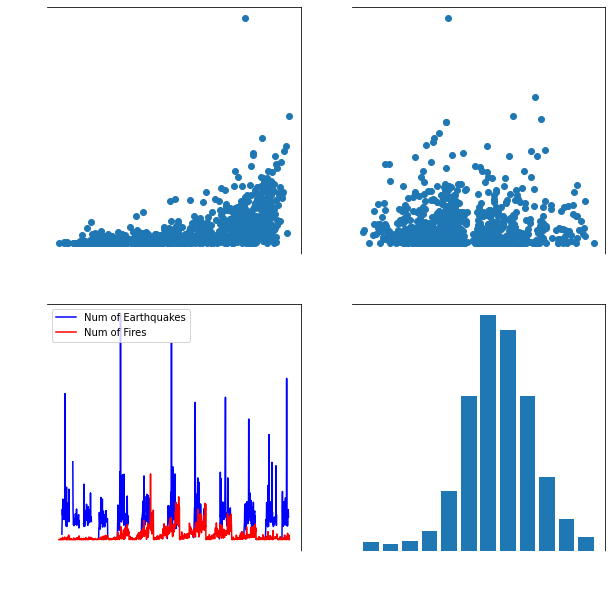

In [153]:
figure, ax = plt.subplots(2, 2)

figure.set_size_inches(10, 10)

#Plot temperature vs. number of fires
month_fire_count.fire_dict_values(by=['DATE'], axis=0,inplace=True)
# print(month_fire_count)

ax[0][0].scatter(month_fire_count['AVGTEMP'],month_fire_count['NUMFIRES'])

ax[0][0].set_xlabel("Average Temperature (C)")
ax[0][0].set_ylabel("Number of Fires")

#Plot dry scale vs number of fires
ax[0][1].scatter(month_fire_count['SCALE'],month_fire_count['NUMFIRES'])

ax[0][1].set_xlabel("Drought Scale")
ax[0][1].set_ylabel("Number of Fires")

#Plot num of earthquakes vs fires
ax[1][0].plot(month_fire_count['DATE'],month_fire_count['NUMEARTHQUAKES'], color='b', label='Num of Earthquakes')
ax[1][0].plot(month_fire_count['DATE'],month_fire_count['NUMFIRES'], color='r', label='Num of Fires')
ax[1][0].set_xlabel("Date")
ax[1][0].legend(loc="upper left")

#Display average num of fires per month
month = list(fire_dict.keys())
temp = list(fire_dict.values())

ax[1][1].bar(range(len(fire_dict)), temp, tick_label=month)
ax[1][1].set_xlabel("Month")
ax[1][1].set_ylabel("Number of Fires")

#Make axis/labels white
for row in range(0,2):
    for column in range(0,2):
        ax[row][column].spines['bottom'].set_color('white')
        ax[row][column].xaxis.label.set_color('white')
        ax[row][column].tick_params(axis='x', colors='white')
        ax[row][column].spines['left'].set_color('white')
        ax[row][column].yaxis.label.set_color('white')
        ax[row][column].tick_params(axis='y', colors='white')

plt.show()